Particle Swarm Optimization from Scratch with Python

Particle swarm optimization (PSO) is one of those rare tools that’s comically simple to code and implement while producing bizarrely good results. Developed in 1995 by Eberhart and Kennedy, PSO is a biologically inspired optimization routine designed to mimic birds flocking or fish schooling. 

PSO is not guaranteed to find the global minimum, but it does a solid job in challenging, high dimensional, non-convex, non-continuous environments. 

In this short introductory tutorial, PSO is demonstrated in its absolute simplest form. 

https://nathanrooy.github.io/posts/2016-08-17/simple-particle-swarm-optimization-with-python/

# Example 1 - plot and initial particles

(0.0, 5.0)

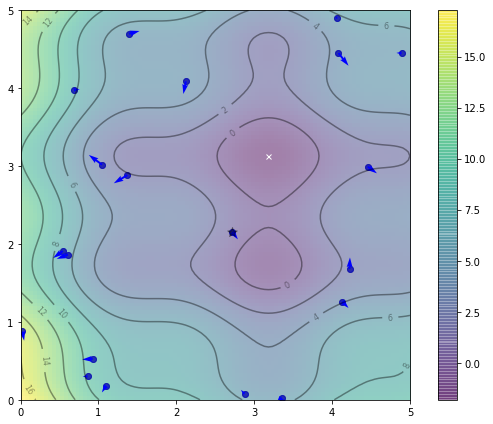

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

# Example 2 - Particles after iterations

PSO found best solution at f([3.180382   3.13021942])=-1.8082252474463547
Global optimal at f([3.1818181818181817, 3.131313131313131])=-1.8082706615747688


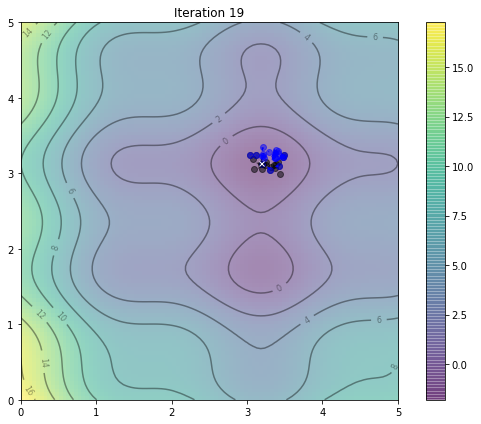

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

def f(x,y):
    "Objective function"
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)
    
# Compute and plot the function in 3D within [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find the global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# Hyper-parameter of the algorithm
c1 = c2 = 0.1
w = 0.8

# Create particles
n_particles = 20
np.random.seed(100)
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

def update():
    "Function to do one iteration of particle swarm optimization"
    global V, X, pbest, pbest_obj, gbest, gbest_obj
    # Update params
    r1, r2 = np.random.rand(2)
    V = w * V + c1*r1*(pbest - X) + c2*r2*(gbest.reshape(-1,1)-X)
    X = X + V
    obj = f(X[0], X[1])
    pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
    pbest_obj = np.array([pbest_obj, obj]).min(axis=0)
    gbest = pbest[:, pbest_obj.argmin()]
    gbest_obj = pbest_obj.min()

# Set up base figure: The contour map
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)
img = ax.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', alpha=0.5)
fig.colorbar(img, ax=ax)
ax.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
pbest_plot = ax.scatter(pbest[0], pbest[1], marker='o', color='black', alpha=0.5)
p_plot = ax.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([gbest[0]], [gbest[1]], marker='*', s=100, color='black', alpha=0.4)
ax.set_xlim([0,5])
ax.set_ylim([0,5])

def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title = 'Iteration {:02d}'.format(i)
    # Update params
    update()
    # Set picture
    ax.set_title(title)
    pbest_plot.set_offsets(pbest.T)
    p_plot.set_offsets(X.T)
    p_arrow.set_offsets(X.T)
    p_arrow.set_UVC(V[0], V[1])
    gbest_plot.set_offsets(gbest.reshape(1,-1))
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot


#anim = FuncAnimation(fig, animate, frames=list(range(1,50)), interval=500, blit=False, repeat=True)
#anim.save("PSO.gif", dpi=120, writer="imagemagick")

'''for j in range(1,n_particles):
    #ani = animation.FuncAnimation(fig, animate, frames=10, repeat=False)
    animate(j)
    #plt.show()
    #print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
    '''

print("PSO found best solution at f({})={}".format(gbest, gbest_obj))
print("Global optimal at f({})={}".format([x_min,y_min], f(x_min,y_min)))

# Example 3

In [4]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Simple Particle Swarm Optimization (PSO) with Python
#   July, 2016
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import random
import math

#--- COST FUNCTION ------------------------------------------------------------+

# function we are attempting to optimize (minimize)
def objective(x):
    total=0
    for i in range(len(x)):
        total+=x[i]**2
    return total

#--- MAIN ---------------------------------------------------------------------+
#individual members in the population/particle
class Particle:
    def __init__(self,x0):
        self.position_i=[]          # particle position
        self.velocity_i=[]          # particle velocity
        self.pos_best_i=[]          # best position individual
        self.err_best_i=-1          # best error individual
        self.err_i=-1               # error individual

        for i in range(0,num_dimensions):
            self.velocity_i.append(random.uniform(-1,1))
            self.position_i.append(x0[i])

    # evaluate current fitness
    def evaluate(self,costFunc):
        self.err_i=costFunc(self.position_i)

        # check to see if the current position is an individual best
        if self.err_i < self.err_best_i or self.err_best_i==-1:
            self.pos_best_i=self.position_i
            self.err_best_i=self.err_i

    # update new particle velocity
    def update_velocity(self,pos_best_g):
        w=0.5       # constant inertia weight (how much to weigh the previous velocity)
        c1=1        # cognative constant
        c2=2        # social constant

        for i in range(0,num_dimensions):
            r1=random.random()
            r2=random.random()

            vel_cognitive=c1*r1*(self.pos_best_i[i]-self.position_i[i])
            vel_social=c2*r2*(pos_best_g[i]-self.position_i[i])
            self.velocity_i[i]=w*self.velocity_i[i]+vel_cognitive+vel_social

    # update the particle position based off new velocity updates
    def update_position(self,bounds):
        for i in range(0,num_dimensions):
            self.position_i[i]=self.position_i[i]+self.velocity_i[i]

            # adjust maximum position if necessary
            if self.position_i[i]>bounds[i][1]:
                self.position_i[i]=bounds[i][1]

            # adjust minimum position if neseccary
            if self.position_i[i] < bounds[i][0]:
                self.position_i[i]=bounds[i][0]
                
class PSO():
    #costFunc = objective
    def __init__(self,costFunc,x0,bounds,num_particles,maxiter):
        global num_dimensions

        num_dimensions=len(x0)
        err_best_g=-1                   # best error for group
        pos_best_g=[]                   # best position for group

        # establish the swarm
        swarm=[]
        for i in range(0,num_particles):
            swarm.append(Particle(x0))

        # begin optimization loop
        i=0
        while i < maxiter:
            #print i,err_best_g
            # cycle through particles in swarm and evaluate fitness
            for j in range(0,num_particles):
                swarm[j].evaluate(costFunc)

                # determine if current particle is the best (globally)
                if swarm[j].err_i < err_best_g or err_best_g == -1:
                    pos_best_g=list(swarm[j].position_i)
                    err_best_g=float(swarm[j].err_i)

            # cycle through swarm and update velocities and position
            for j in range(0,num_particles):
                swarm[j].update_velocity(pos_best_g)
                swarm[j].update_position(bounds)
            i+=1

        # print final results
        print ('FINAL:')
        print ("pos_best_g: ", pos_best_g)
        print ("err_best_g: ", err_best_g)

if __name__ == "__PSO__":
    main()

#--- RUN ----------------------------------------------------------------------+

initial=[11,5]               # initial starting location [x1,x2...]
bounds=[(-10,10),(-10,10)]  # input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
PSO(objective,initial,bounds,num_particles=15,maxiter=100)

#--- END ----------------------------------------------------------------------+

FINAL:
pos_best_g:  [2.1026213017161292e-10, -3.278499790263416e-10]
err_best_g:  1.5169577213187693e-19


# Example 4
Using pyswarm package
- need to install pyswarm

In [19]:
from pyswarm import pso

#objective function
def objfun(x):
    x1 = x[0]
    x2 = x[1]
    return x1**4 - 2*x2*x1**2 + x2**2 + x1**2 - 2*x1 + 5

#constraint
def con(x):
    x1 = x[0]
    x2 = x[1]
    return [-(x1 + 0.25)**2 + 0.75*x2]

lb = [-3, -1]
ub = [2, 6]

xopt, fopt = pso(objfun, lb, ub, f_ieqcons=con)
print(xopt,fopt)
print(banana(xopt))

# Optimum should be around x=[0.5, 0.76] with objfun(x)=4.5 and con(x)=0

Stopping search: Swarm best objective change less than 1e-08
[0.49815289 0.74631033] 4.5000079593496976
4.5000079593496976


# Example 5 - Travelling salesman problem

<img src="graph.png">

In [5]:
# encoding:utf-8

'''
    Solution for Travelling Salesman Problem using PSO (Particle Swarm Optimization)
    Discrete PSO for TSP

    References: 
        http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.258.7026&rep=rep1&type=pdf
        http://www.cs.mun.ca/~tinayu/Teaching_files/cs4752/Lecture19_new.pdf
        http://www.swarmintelligence.org/tutorials.php

    References are in the folder "references" of the repository.
'''

from operator import attrgetter
import random, sys, time, copy


# class that represents a graph
class Graph:

    def __init__(self, amount_vertices):
        self.edges = {} # dictionary of edges
        self.vertices = set() # set of vertices
        self.amount_vertices = amount_vertices # amount of vertices


    # adds a edge linking "src" in "dest" with a "cost"
    def addEdge(self, src, dest, cost = 0):
        # checks if the edge already exists
        if not self.existsEdge(src, dest):
            self.edges[(src, dest)] = cost
            self.vertices.add(src)
            self.vertices.add(dest)


    # checks if exists a edge linking "src" in "dest"
    def existsEdge(self, src, dest):
        return (True if (src, dest) in self.edges else False)


    # shows all the links of the graph
    def showGraph(self):
        print('Showing the graph:\n')
        for edge in self.edges:
            print('%d linked in %d with cost %d' % (edge[0], edge[1], self.edges[edge]))

    # returns total cost of the path
    def getCostPath(self, path):
        
        total_cost = 0
        for i in range(self.amount_vertices - 1):
            total_cost += self.edges[(path[i], path[i+1])]

        # add cost of the last edge
        total_cost += self.edges[(path[self.amount_vertices - 1], path[0])]
        return total_cost


    # gets random unique paths - returns a list of lists of paths
    def getRandomPaths(self, max_size):

        random_paths, list_vertices = [], list(self.vertices)

        initial_vertice = random.choice(list_vertices)
        if initial_vertice not in list_vertices:
            print('Error: initial vertice %d not exists!' % initial_vertice)
            sys.exit(1)

        list_vertices.remove(initial_vertice)
        list_vertices.insert(0, initial_vertice)

        for i in range(max_size):
            list_temp = list_vertices[1:]
            random.shuffle(list_temp)
            list_temp.insert(0, initial_vertice)

            if list_temp not in random_paths:
                random_paths.append(list_temp)

        return random_paths


# class that represents a complete graph
class CompleteGraph(Graph):

    # generates a complete graph
    def generates(self):
        for i in range(self.amount_vertices):
            for j in range(self.amount_vertices):
                if i != j:
                    weight = random.randint(1, 10)
                    self.addEdge(i, j, weight)


# class that represents a particle
class Particle:

    def __init__(self, solution, cost):

        # current solution
        self.solution = solution

        # best solution (fitness) it has achieved so far
        self.pbest = solution

        # set costs
        self.cost_current_solution = cost
        self.cost_pbest_solution = cost

        # velocity of a particle is a sequence of 4-tuple
        # (1, 2, 1, 'beta') means SO(1,2), prabability 1 and compares with "beta"
        self.velocity = []

    # set pbest
    def setPBest(self, new_pbest):
        self.pbest = new_pbest

    # returns the pbest
    def getPBest(self):
        return self.pbest

    # set the new velocity (sequence of swap operators)
    def setVelocity(self, new_velocity):
        self.velocity = new_velocity

    # returns the velocity (sequence of swap operators)
    def getVelocity(self):
        return self.velocity

    # set solution
    def setCurrentSolution(self, solution):
        self.solution = solution

    # gets solution
    def getCurrentSolution(self):
        return self.solution

    # set cost pbest solution
    def setCostPBest(self, cost):
        self.cost_pbest_solution = cost

    # gets cost pbest solution
    def getCostPBest(self):
        return self.cost_pbest_solution

    # set cost current solution
    def setCostCurrentSolution(self, cost):
        self.cost_current_solution = cost

    # gets cost current solution
    def getCostCurrentSolution(self):
        return self.cost_current_solution

    # removes all elements of the list velocity
    def clearVelocity(self):
        del self.velocity[:]


# PSO algorithm
class PSO:

    def __init__(self, graph, iterations, size_population, beta=1, alfa=1):
        self.graph = graph # the graph
        self.iterations = iterations # max of iterations
        self.size_population = size_population # size population
        self.particles = [] # list of particles
        self.beta = beta # the probability that all swap operators in swap sequence (gbest - x(t-1))
        self.alfa = alfa # the probability that all swap operators in swap sequence (pbest - x(t-1))

        # initialized with a group of random particles (solutions)
        solutions = self.graph.getRandomPaths(self.size_population)

        # checks if exists any solution
        if not solutions:
            print('Initial population empty! Try run the algorithm again...')
            sys.exit(1)

        # creates the particles and initialization of swap sequences in all the particles
        for solution in solutions:
            # creates a new particle
            particle = Particle(solution=solution, cost=graph.getCostPath(solution))
            # add the particle
            self.particles.append(particle)

        # updates "size_population"
        self.size_population = len(self.particles)


    # set gbest (best particle of the population)
    def setGBest(self, new_gbest):
        self.gbest = new_gbest

    # returns gbest (best particle of the population)
    def getGBest(self):
        return self.gbest


    # shows the info of the particles
    def showsParticles(self):

        print('Showing particles...\n')
        for particle in self.particles:
            print('pbest: %s\t|\tcost pbest: %d\t|\tcurrent solution: %s\t|\tcost current solution: %d' \
                % (str(particle.getPBest()), particle.getCostPBest(), str(particle.getCurrentSolution()),
                            particle.getCostCurrentSolution()))
        print('')


    def run(self):

        # for each time step (iteration)
        for t in range(self.iterations):

            # updates gbest (best particle of the population)
            self.gbest = min(self.particles, key=attrgetter('cost_pbest_solution'))

            # for each particle in the swarm
            for particle in self.particles:

                particle.clearVelocity() # cleans the speed of the particle
                temp_velocity = []
                solution_gbest = copy.copy(self.gbest.getPBest()) # gets solution of the gbest
                solution_pbest = particle.getPBest()[:] # copy of the pbest solution
                solution_particle = particle.getCurrentSolution()[:] # gets copy of the current solution of the particle

                # generates all swap operators to calculate (pbest - x(t-1))
                for i in range(self.graph.amount_vertices):
                    if solution_particle[i] != solution_pbest[i]:
                        # generates swap operator
                        swap_operator = (i, solution_pbest.index(solution_particle[i]), self.alfa)

                        # append swap operator in the list of velocity
                        temp_velocity.append(swap_operator)

                        # makes the swap
                        aux = solution_pbest[swap_operator[0]]
                        solution_pbest[swap_operator[0]] = solution_pbest[swap_operator[1]]
                        solution_pbest[swap_operator[1]] = aux

                # generates all swap operators to calculate (gbest - x(t-1))
                for i in range(self.graph.amount_vertices):
                    if solution_particle[i] != solution_gbest[i]:
                        # generates swap operator
                        swap_operator = (i, solution_gbest.index(solution_particle[i]), self.beta)

                        # append swap operator in the list of velocity
                        temp_velocity.append(swap_operator)

                        # makes the swap
                        aux = solution_gbest[swap_operator[0]]
                        solution_gbest[swap_operator[0]] = solution_gbest[swap_operator[1]]
                        solution_gbest[swap_operator[1]] = aux

                
                # updates velocity
                particle.setVelocity(temp_velocity)

                # generates new solution for particle
                for swap_operator in temp_velocity:
                    if random.random() <= swap_operator[2]:
                        # makes the swap
                        aux = solution_particle[swap_operator[0]]
                        solution_particle[swap_operator[0]] = solution_particle[swap_operator[1]]
                        solution_particle[swap_operator[1]] = aux
                
                # updates the current solution
                particle.setCurrentSolution(solution_particle)
                # gets cost of the current solution
                cost_current_solution = self.graph.getCostPath(solution_particle)
                # updates the cost of the current solution
                particle.setCostCurrentSolution(cost_current_solution)

                # checks if current solution is pbest solution
                if cost_current_solution < particle.getCostPBest():
                    particle.setPBest(solution_particle)
                    particle.setCostPBest(cost_current_solution)
        

if __name__ == "__main__":
    
    # creates the Graph instance
    graph = Graph(amount_vertices=5)

    # This graph is in the folder "images" of the repository.
    graph.addEdge(0, 1, 1)
    graph.addEdge(1, 0, 1)
    graph.addEdge(0, 2, 3)
    graph.addEdge(2, 0, 3)
    graph.addEdge(0, 3, 4)
    graph.addEdge(3, 0, 4)
    graph.addEdge(0, 4, 5)
    graph.addEdge(4, 0, 5)
    graph.addEdge(1, 2, 1)
    graph.addEdge(2, 1, 1)
    graph.addEdge(1, 3, 4)
    graph.addEdge(3, 1, 4)
    graph.addEdge(1, 4, 8)
    graph.addEdge(4, 1, 8)
    graph.addEdge(2, 3, 5)
    graph.addEdge(3, 2, 5)
    graph.addEdge(2, 4, 1)
    graph.addEdge(4, 2, 1)
    graph.addEdge(3, 4, 2)
    graph.addEdge(4, 3, 2)

    # creates a PSO instance
    pso = PSO(graph, iterations=100, size_population=10, beta=1, alfa=0.9)
    pso.run() # runs the PSO algorithm
    pso.showsParticles() # shows the particles

    # shows the global best particle
    print('gbest: %s | cost: %d\n' % (pso.getGBest().getPBest(), pso.getGBest().getCostPBest()))

    
    # random graph
    print('Random graph...')
    random_graph = CompleteGraph(amount_vertices=20)
    random_graph.generates()
    pso_random_graph = PSO(random_graph, iterations=10000, size_population=10, beta=1, alfa=1)
    pso_random_graph.run()
    print('gbest: %s | cost: %d\n' % (pso_random_graph.getGBest().getPBest(), 
                    pso_random_graph.getGBest().getCostPBest()))
    

Showing particles...

pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 1, 0, 3, 4]	|	cost pbest: 9	|	current solution: [2, 4, 0, 3, 1]	|	cost current solution: 15
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9
pbest: [2, 4, 3, 0, 1]	|	cost pbest: 9	|	current solution: [2, 4, 3, 0, 1]	|	cost current solution: 9

gbest: [2, 4, 3, 0, 1] | cost: 9

Random graph...
gbest: [